# Convolutional Classifier Model to identify images to categories
1. Convolution
-> Feature Detector -> Feature Map
2. Pooling: ReLU Function -> Feature Maps Add non-linearity on the feature maps
-> Sparsity
-> ReLU Function
-> Max Pooling
3. Flattening
- Neural network: input -> hidden -> output 
-> n = P1W1 + P2W2 + P3W3 + b
-> a = f(n)

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

In [2]:
fashion_train_df = pd.read_csv('csv/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('csv/fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training = np.array(fashion_train_df , dtype = 'float32')
test = np.array(fashion_test_df , dtype = 'float32')

In [5]:
i = random.randint(1,60000)

9.0

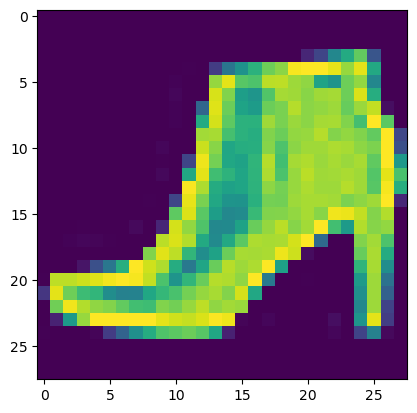

In [6]:
i = random.randint(1,60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

In [8]:
X_train = training[:, 1:]/255 # -> for normalisation
y_train = training[:, 0]

In [9]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [10]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

training = np.array(fashion_train_df , dtype = 'float32')
test = np.array(fashion_test_df , dtype = 'float32')
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = test[:, 1:]/255
y_test = test[:, 0]

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

# To pixels
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

# Model Setting
cnn_model = Sequential()
cnn_model.add(Conv2D, 32, 3, 3, input_shape = (28,28,1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
              
# Model Training
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
epochs = 50
history = cnn_model.fit(X_train,y_train,batch_size = 512,nb_epoch = epochs,verbose = 1,validation_data = (X_validate, y_validate))
